### Question 1

First, we must parse the penguin data set.

In [82]:
import pandas as pd

URL = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

df = pd.read_csv(URL)

Next, we create a histogram figure using the penguins data set.

In [83]:
import plotly.express as px

fig = px.histogram(df, x="flipper_length_mm", color="species", 
                   title="Histogram of Penguin Flipper Length by Species",
                   nbins=30)

Now that we have a histogram representation of the flipper length data, we can use `fig.add[h/v]line()` and `fig.add[h/v]rect()`methods to mark location and scale.

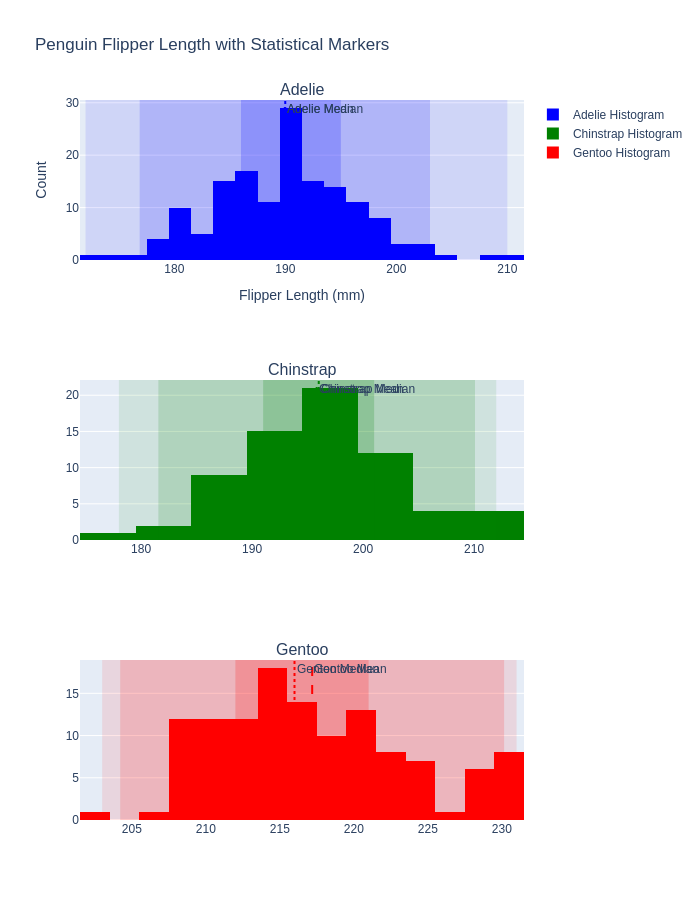

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
URL = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(URL)

# Get the unique species and assign custom colors
species = df['species'].unique()
colors = ['blue', 'green', 'red']

# Create subplots: 1 row for each species
fig = make_subplots(rows=len(species), cols=1, subplot_titles=species)

# Loop over each species to calculate statistics and add histogram traces
for idx, sp in enumerate(species):
    species_data = df[df['species'] == sp]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)

    # Add histogram for each species in its own row (subplot)
    fig.add_trace(go.Histogram(x=species_data, name=f"{sp} Histogram", marker=dict(color=colors[idx])),
                  row=idx+1, col=1)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_dash="dash", line_color=colors[idx], annotation_text=f"{sp} Mean", row=idx+1, col=1)
    fig.add_vline(x=median, line_dash="dot", line_color=colors[idx], annotation_text=f"{sp} Median", row=idx+1, col=1)
    
    # Add rectangle for range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor=colors[idx], opacity=0.1, line_width=0, row=idx+1, col=1)
    
    # Add rectangle for interquartile range (IQR: Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor=colors[idx], opacity=0.2, line_width=0, row=idx+1, col=1)
    
    # Add rectangle for mean ± 2 standard deviations
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, fillcolor=colors[idx], opacity=0.15, line_width=0, row=idx+1, col=1)

# Update layout
fig.update_layout(
    title="Penguin Flipper Length with Statistical Markers",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    height=900  # Adjust the height to fit all subplots
)

# Show the plot
fig.show(renderer="png")

##### Link to ChatBot Session(s): https://chatgpt.com/share/66f0c76f-7b28-800f-bc30-d2b87d26cbe5, https://chatgpt.com/share/66f23cec-9c30-800f-a2ef-877a24c2572a

##### Summary of ChatBot Session: 
In this conversation, you asked for various tasks involving the penguins dataset from the provided URL:

1. Loading and Exploring the Dataset: 
We first discussed loading the dataset using Pandas. You then requested to create a histogram from the dataset, specifically for flipper_length_mm.
2. Histogram Creation: 
I provided two approaches for creating histograms:
Using plotly.express to quickly generate a histogram for flipper_length_mm grouped by species.
Using plotly.graph_objects with go.Histogram() to manually create histograms for each species and layer them for more control.
3. Marking Statistical Information:
You wanted to mark specific statistical metrics (mean, median, range, interquartile range, and standard deviation bounds) on the histogram.
I showed how to use fig.add_vline() to mark the location (mean and median) and fig.add_vrect() to mark the scale (range, IQR, and mean ± 2 standard deviations) for the flipper_length_mm of each species.
4. (New Chat Session): 
I edited the original code to display the histograms separately instead of being overlaid.

This covered both visualization of data distribution and adding statistical insights directly to the plot for each species in the penguins dataset.

### Question 2

The ChatBot was presented with the same problem as above, but directed to access seaborn to produce the plots.

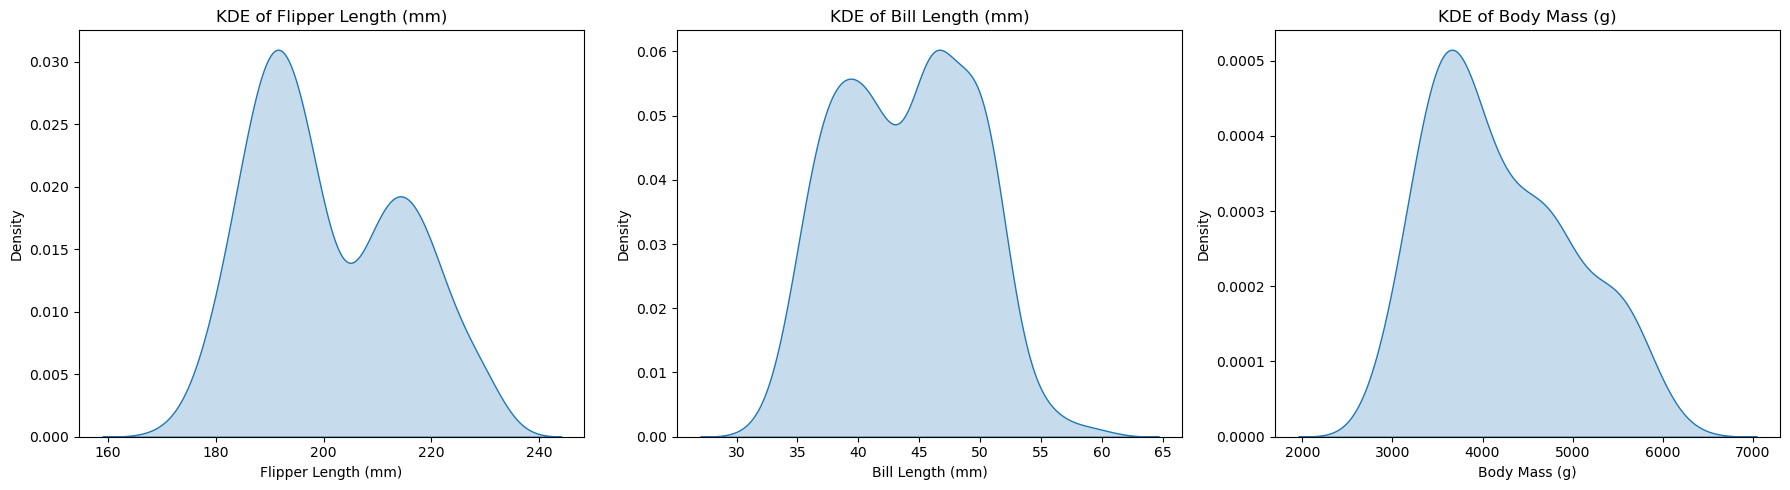

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the penguins dataset
URL = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(URL)

# Set the plot size and style
plt.figure(figsize=(18, 5))

# Create a 1x3 grid of plots
plt.subplot(1, 3, 1)
sns.kdeplot(df['flipper_length_mm'].dropna(), fill=True)
plt.title("KDE of Flipper Length (mm)")
plt.xlabel("Flipper Length (mm)")

plt.subplot(1, 3, 2)
sns.kdeplot(df['bill_length_mm'].dropna(), fill=True)
plt.title("KDE of Bill Length (mm)")
plt.xlabel("Bill Length (mm)")

plt.subplot(1, 3, 3)
sns.kdeplot(df['body_mass_g'].dropna(), fill=True)
plt.title("KDE of Body Mass (g)")
plt.xlabel("Body Mass (g)")

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


##### Link to ChatBot Session: https://chatgpt.com/share/66f0c93f-a9e0-800f-9a5d-87a712841958

##### Summary of ChatBot Session: 

1. Data Analysis Request (Penguins Dataset):
You provided the URL of a dataset containing penguins' characteristics and asked me to generate a histogram of flipper_length_mm with Kernel Density Estimation (KDE).
Due to connectivity limitations, I was unable to directly access the dataset, but I provided you with Python code to load the dataset locally, create a histogram, and apply KDE using seaborn.
2. Kernel Density Estimation Plot Layout:
You requested that the KDE plots be organized into a row of three. I provided Python code to generate three KDE plots (for flipper_length_mm, bill_length_mm, and body_mass_g), arranged in a single row using plt.subplot() to create a 1x3 grid.
Provided Python Code:
3. The code I generated covers the steps to:
Load the penguins dataset.
Plot KDEs for multiple variables (flipper_length_mm, bill_length_mm, and body_mass_g).
Organize the KDE plots in a row of three using Matplotlib's subplot() and tight_layout() for visual clarity.

### Question 3

Having looked at the images, I think that each of these representations visualize distributions effectively. However, there are some key differences. 

Box plots very clearly show quartiles and the median. Histograms use bars to reflect the frequency of values in different intervals. Kernel density does the same thing as histograms, but have more fluid shape.

ChatBot Interaction:
After providing the above thoughts to ChatBot, it confirmed that I am largely correct. The place where I was wrong was about the similarity between kernel density and histograms. ChatBot pointed out that histograms depend on bin size, and KDE depends on bandwidth, both of which can affect the appearance of the distribution. Their function is not entirely the same.

Pros and Cons:

Box Plot - 
Pros = clear summary of quartile and range, easily show outliers, compact and effective for comparing mulitple data sets.
Cons = Doesn't show distribution shape, lacks information about individual frequencies.

Histogram -
Pros = shows frequency of data points across intervals, overall shape of distribution understood.
Cons = sensitive to bin size, less compact for comparing multiple data sets.

Kernel Density Estimate -
Pros = smooth representation of distribution, not dependent on bin size, visually appealing for continuous data
Cons = choice of bandwidth can affect the shape, may obsure discrete data or small sample sizes.

Preference:
I have no preference for any of these visual representations. I think each representations are appropriate to use in different situations. 

##### Link to ChatBot Session: https://chatgpt.com/share/66f0d298-527c-800f-9a6b-2ac1e0d8e7ac

##### Summary of ChatBot Session:

1. You provided an initial analysis comparing different types of distribution visualizations: box plots, histograms, and kernel density plots. Your initial observations were:

Box plots clearly show quartiles and the median.
Histograms reflect the frequency of values in different intervals.Kernel density plots have a fluid shape but visualize the same distribution information as histograms.
I refined your description and added more precision:

2. Box plots provide a compact summary with quartiles, median, and outliers, but lack details on the frequency distribution within the data.
Histograms show the frequency of data points in bins but are sensitive to bin size.
Kernel density plots smooth the data into a continuous curve, which avoids the binning issues of histograms but requires careful bandwidth selection to avoid oversmoothing.
Conversation 2: Pros and Cons of Distribution Visualizations
You asked for a detailed comparison of the pros and cons for each representation:

3. Box plots offer a compact summary and allow for outlier detection but lack detailed frequency information and can miss multimodal distributions.
Histograms are intuitive and show the overall shape of the distribution, but they are sensitive to bin size and may appear blocky.
Kernel density plots provide a smooth view of the distribution and highlight multiple modes but can obscure details if oversmoothed and may be harder to interpret for some users.

### Question 4

1. Similar means and similar variances: A and C 

2. Similar means but different variances: C and D

3. Similar variances but different means: A and C 

4. Different means and different variances: A and D

### Question 5

1. Right (Positive) Skewness: 

Distribution where the tail extended towards the right. 
Mean > Median > Mode because the larger values pull the mean towards the right (towards a greater value).

2. Left (Negative) Skewness: 

Distribution where the tail extended towards the left. 
Mean < Median < Mode because the larger values pull the mean towards the left (towards a lesser value).

3. Symmertrical Distribution:

Distribution that is perfectly symmetrical.
Mean = Median = Mode.

The key difference between mean and median is that the mean is affected by extreme values while the median is not. The relationship between the mean and median gives insight into the skewness of a distribution. If mean > median, distribution is skewed to right. If mean < median, distribution is skewed to left.

Let's take a look at the given code:

First, we import some relevant libraries. There was an error in the original code where pandas was imported instead of plotly.express. Since px is referenced in the following lines, I changed it to `import plotly.express as px`.

In [86]:
from scipy import stats
import plotly.express as px # Changed from import pandas as pd.
import numpy as np

Next, we generate a Gamma distribution object. The `stats.gamma(a=2, scale=2)` creates the Gamma distribtion object. The `.rvs(size=1000)` generates 1000 randome samples from the Gamma distribution.

In [87]:
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)

Using the Gamma distribution object, we generate a histogram. I have also added some code to show the histogram that has been generated.

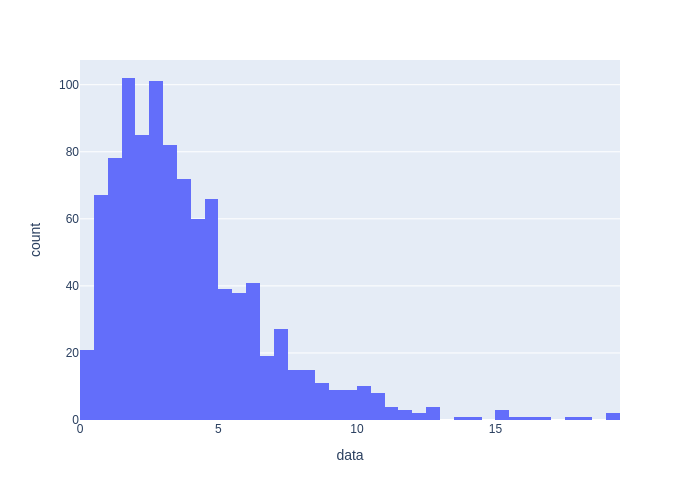

In [88]:
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

fig1.show(renderer="png") # Showing the graph!

Using the original `sample1` distribution, we generate the mean and the median. I have assigned each value to their own variables.

In [89]:
sample1_mean = sample1.mean() # Mean.
sample1_mean = np.quantile(sample1, [0.5]) # Median.

And finally, we generate a negatively skewed sample. I have also added some code to generate a histogram using the Gamma distribution object, as well as some code to generate the mean and median of `sample2`.

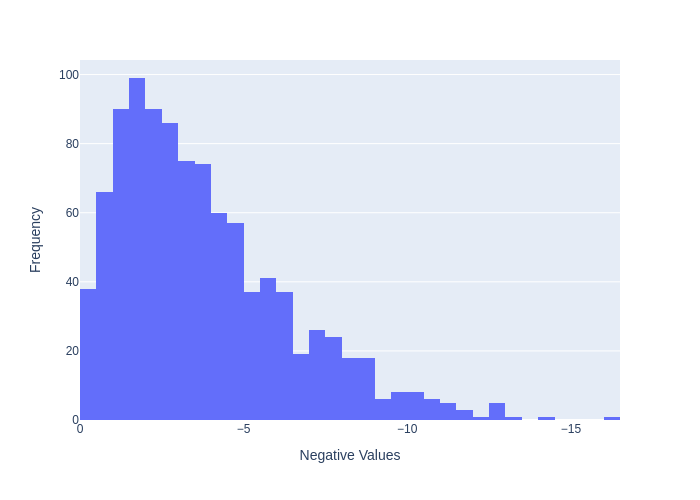

In [90]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.update_layout(xaxis_title='Negative Values', yaxis_title='Frequency', xaxis=dict(autorange='reversed'))

fig2.show(renderer="png")

sample2_mean = sample2.mean() # Mean assigned to variable.
sample2_median = np.quantile(sample2, [0.5]) # Median assigned to variable.

> The chart above LOOKS positively skewed, but the key identifier that it is a negative skew is the fact that the values are negative!!!

Let's identify the relationship between the mean and median using the histograms we generated. I will put them side by side, as well as show the means and medians of each graph:

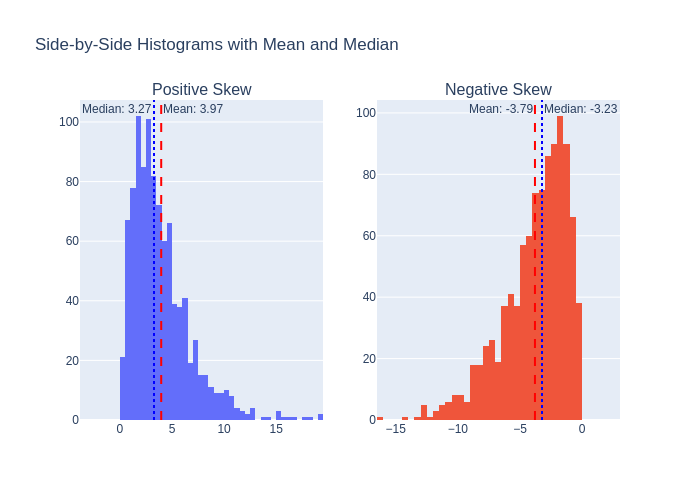

In [91]:
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import stats
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming you already have sample1 and sample2 generated
sample1_mean = sample1.mean()  # Mean for sample1
sample1_median = np.quantile(sample1, 0.5)  # Median for sample1

sample2_mean = sample2.mean()  # Mean for sample2
sample2_median = np.quantile(sample2, 0.5)  # Median for sample2

# Create a subplot figure with 1 row and 2 columns
fig_combined = make_subplots(rows=1, cols=2, subplot_titles=("Positive Skew", "Negative Skew"))

# Add sample1 histogram to the first subplot
fig_combined.add_trace(go.Histogram(x=sample1, name="Sample 1"), row=1, col=1)

# Add sample2 histogram to the second subplot
fig_combined.add_trace(go.Histogram(x=sample2, name="Sample 2"), row=1, col=2)

# Add vertical lines and annotations for mean and median on the first subplot (Sample 1)
fig_combined.add_shape(
    type="line", line=dict(color="red", dash="dash"),
    x0=sample1_mean, x1=sample1_mean, y0=0, y1=1,
    xref='x1', yref='paper'  # x1 refers to the x-axis of the first plot
)
fig_combined.add_shape(
    type="line", line=dict(color="blue", dash="dot"),
    x0=sample1_median, x1=sample1_median, y0=0, y1=1,
    xref='x1', yref='paper'
)
fig_combined.add_annotation(
    x=sample1_mean, y=1, yref="paper", text=f"Mean: {sample1_mean:.2f}", showarrow=False, xanchor="left", xref='x1'
)
fig_combined.add_annotation(
    x=sample1_median, y=1, yref="paper", text=f"Median: {sample1_median:.2f}", showarrow=False, xanchor="right", xref='x1'
)

# Add vertical lines and annotations for mean and median on the second subplot (Sample 2)
fig_combined.add_shape(
    type="line", line=dict(color="red", dash="dash"),
    x0=sample2_mean, x1=sample2_mean, y0=0, y1=1,
    xref='x2', yref='paper'  # x2 refers to the x-axis of the second plot
)
fig_combined.add_shape(
    type="line", line=dict(color="blue", dash="dot"),
    x0=sample2_median, x1=sample2_median, y0=0, y1=1,
    xref='x2', yref='paper'
)
fig_combined.add_annotation(
    x=sample2_mean, y=1, yref="paper", text=f"Mean: {sample2_mean:.2f}", showarrow=False, xanchor="right", xref='x2'
)
fig_combined.add_annotation(
    x=sample2_median, y=1, yref="paper", text=f"Median: {sample2_median:.2f}", showarrow=False, xanchor="left", xref='x2'
)

# Update layout for better display
fig_combined.update_layout(title_text="Side-by-Side Histograms with Mean and Median", showlegend=False)

# Show the combined plot
fig_combined.show(renderer="png")

As we see, in the "Positive Skew" histogram, the mean is greater than the median because it has been affected by outliers that are greater. In the "Negative Skew" histogram, the mean is less than the median because it has been affected by outliers that are lesser.

##### Link to ChatBot Session: https://chatgpt.com/share/66f23b8e-5948-800f-a1ea-dc789509f839

##### Summary of ChatBot Session: 

1. General Relationship between Mean, Median, and Skewness:
We discussed how the mean, median, and mode relate to skewness in distributions:
Right (Positive) Skewness: Mean > Median > Mode
Left (Negative) Skewness: Mean < Median < Mode
Symmetrical Distribution: Mean = Median = Mode
2. Code Explanation:
You shared a Python code snippet involving the generation of Gamma-distributed data and visualization with Plotly.
I provided an explanation of each part of the code, from generating random samples to calculating the mean and median of the dataset.
3. Generating a Graph for the Negatively Skewed Sample:
You asked how to plot the negatively skewed sample (sample2).
I shared two approaches using matplotlib and plotly.express to generate a histogram for sample2.
4. Visualizing Mean and Median on Graphs:
You asked how to display the mean and median on a histogram.
I showed how to add vertical lines representing the mean and median on sample1 using plotly.express and add_shape.
5. Issue with Skewness Appearance in Charts:
There was confusion about why the negated Gamma distribution still appeared positively skewed in the graph. I explained how negating the values in sample2 might still visually resemble positive skewness due to the distribution's nature.
We clarified that reversing the x-axis wasn't necessary, and I suggested focusing on ensuring the data visualization reflected the negatively skewed values.
6. Displaying Two Graphs Side by Side:
You wanted to display two histograms (fig1 and fig2) side by side in a Jupyter notebook. I introduced plotly.subplots to create subplots for side-by-side visualization.
I then showed how to display both histograms, each with their respective mean and median.
7. Correcting Mean and Median Display for the Second Graph:
Initially, the mean and median were only shown on the left graph. I corrected this by properly assigning the shapes and annotations to each subplot in the combined figure, ensuring that both histograms displayed the correct mean and median.

### Question 6

Let's parse some data. I am retrieving the flight data set that was used in our very first tutorial.

In [92]:
import pandas as pd

URL = "https://raw.githubusercontent.com/roberthryniewicz/datasets/master/airline-dataset/flights/flights.csv"
df = pd.read_csv(URL)

Next, we want to figure out what we want to show. Using the `df.head()` method, I got a look at the data I am working with.

In [93]:
df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4    926.0         930   1054.0   
4  2008      1           3          4   1829.0        1755   1959.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0          0   
1        1000            WN       3231  ...    5.0     10.0          0   
2         750            WN        448  ...    3.0     17.0          0   
3        1100            WN       1746  ...    3.0      7.0          0   
4        1925            WN       3920  ...    3.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN      NaN   
1               NaN         0           NaN          NaN      NaN   
2               NaN         0           NaN          NaN      NaN   
3               NaN         0           NaN          NaN      NaN   
4               NaN         0           2.0          0.0      0.0   

   SecurityDelay  LateAircraftDelay  
0            NaN                NaN  
1            NaN                NaN  
2            NaN                NaN  
3            NaN                NaN  
4            0.0               32.0  

[5 rows x 29 columns]

Having looked at the data, I thought it might be interesting to generate a histogram of the Taxi-in times listed in the column `TaxiIn`. 

Taxi-in, measured in minutes, refers to the time it takes for a plane to navigate to the gate after landing. 

Before I use the data, I wanted to get rid of any rows that contain missing data in the `TaxiIn` column.

In [94]:
df = df.dropna(subset=['TaxiIn'])

Then, I will generate a histogram of the data. I will also generate the mean and median, and label them on the histogram.

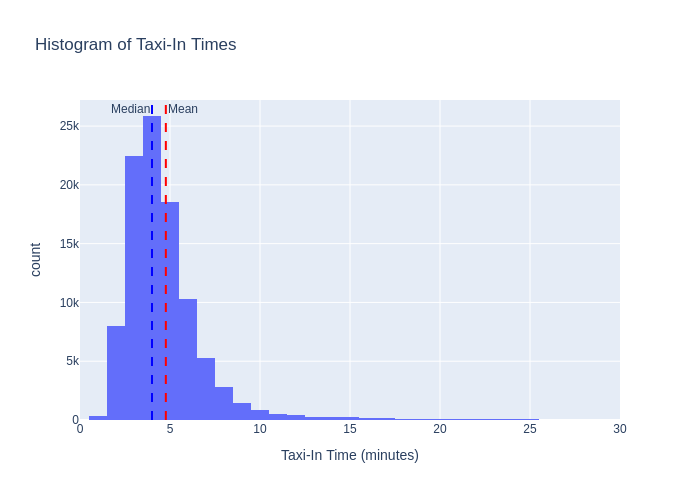

In [95]:
from scipy import stats
import numpy as np
import plotly.express as px

fig = px.histogram(df, x="TaxiIn", title="Histogram of Taxi-In Times")

# Changing the x-axis scale because Taxi-in times generally fall below 30.
fig.update_xaxes(
    range=[0, 30],  # Set the x-axis range
    title_text="Taxi-In Time (minutes)",  # Customize the axis title
    showgrid=True 
)

# Adding median and mean values to histogram.
taxi_in = df['TaxiIn']
taxi_in_mean = taxi_in.mean()
taxi_in_median = np.quantile(taxi_in, [0.5])[0]

fig.add_vline(x=taxi_in_mean, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=taxi_in_median, line_dash="dash", line_color="blue", annotation_text="Median", annotation_position="top left")

    
# Show the plot
fig.show(renderer="png")

As we can see, the resulting histogram is very interesting when it comes to skew! Since the taxi-in times' outliers fall to the right, the distribution is positively skewed. This is confirmed by the fact that the mean is greater than the median. 

From the observing the skew, here are some conclusions we can draw about the flight data itself:

- A traveller is more likely to experience a taxi-in time between 2.5-7.5 minutes.

- Any wait time shorter than 2.5 minutes is unsual. Perhaps the plane is lucky to have been arranged a landing close to the gate. Perhaps there is unusually less traffic on certain days. Perhaps the airport itself is small and taxi-in times there are shorter in general.

- Any wait time longer than 7.5 minutes is also unusual, with longer times being less and less likely to happen. Perhaps these unusually long taxi-in times occured when the airport is busier than usual, such as near holidays or city-wide events like concerts or sports games. It could also be due to increased traffic in the situation of intense weather events like snowstorms or thunderstorms.  

To further our understanding of the data, perhaps comparing this histogram with flight data from other columns can give us a better understanding of the possible reasons the distribution looks the way it does. I think `ArrTime`, `WeatherDelay` and `SecurityDelay` might be good places to start.

### Question 7

Done!

In [96]:
# Animation.
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig

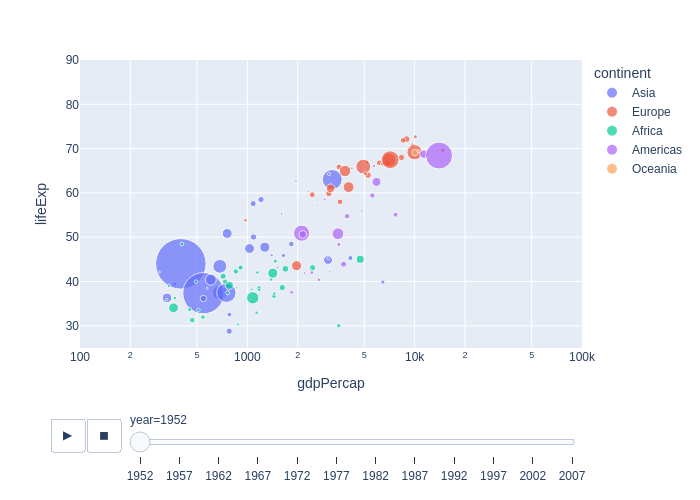

In [97]:
# Static Figure.

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig.show(renderer="png")

### Question 8

Done!

In [98]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])

# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 

bn = bn.sort_values('year')

bn = bn[bn.percent>0.001] # restrict to "common" names

fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                  size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) 

fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top

# Animation.
fig

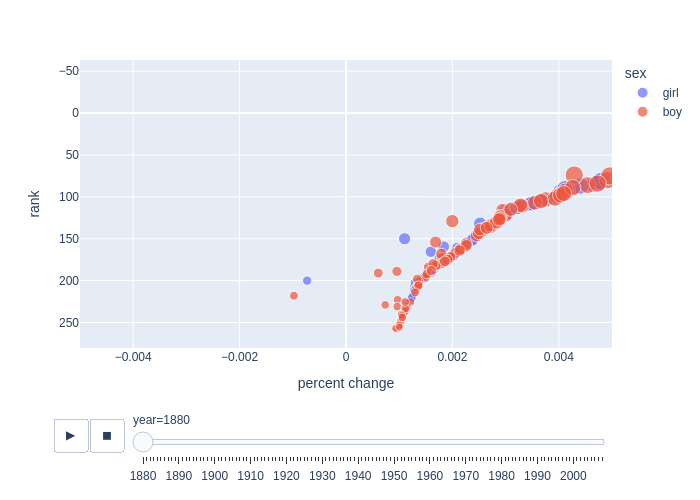

In [99]:
# Static Figure.

fig.show(renderer="png") 

### Question 9

In [100]:
print("Yes!")

Yes!


All summaries were retrieved with: "Please provide a summary of our exchanges here so I can submit them as a record of our interactions as part of a homework assignment" ^_^